# PHYS 411 - Homework 9
That's right, it's another double-long homework. You have two weeks to finish this one, and it is worth 20 points. I highly recommend you start early, as it is challenging and long. Much like before, you may submit this homework at anytime, and I will give you feedback, after which you can resubmit it as many times as you like.

Due Tuesday November 15, 2022 at 9:30.

You can use these buttons below to launch this Jupyter notebook in either [binder](https://mybinder.org/) or [Colab](https://colab.research.google.com/).

[![Open in Binder](https://mybinder.org/badge_logo.svg)](http://beta.mybinder.org/v2/gh/mgrau/phys411/main?urlpath=%2Ftree/Homework%209.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mgrau/phys411/blob/main/Homework%209.ipynb)

When you are finished with your work, please either print to a PDF file and submit via canvas, or submit the raw Jupyter notebook file. For full credit please be sure to clearly explain what you are doing.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Introduction
In this homework, we will be using the optical Bloch equations to simulation various types of spectroscopy experiments on two-level systems. The optical Bloch equations describe the evolution of the density matrix $\rho$ describing the two states $\left|1\right>$ and $\left|2\right>$ with energies $E_1$ and $E_2$, and energy difference $E_2-E_1 = \hbar \omega_0$,
$$
\dot{\rho} = \left(\begin{matrix}\dot{\rho}_{11} & \dot{\rho}_{12} \\ \dot{\rho}_{21} & \dot{\rho}_{22}\end{matrix} \right),
$$
$$\dot{\rho}_{11} = \frac{i}{2}\Omega (\rho_{01} - \rho_{10}) + \Gamma \rho_{11}$$
$$\dot{\rho}_{12} = -\frac{i}{2}\Omega (\rho_{00} - \rho_{11}) - \left(\frac{1}{2}\Gamma +i \Delta\right)\rho_{01}$$
$$\dot{\rho}_{21} = \frac{i}{2}\Omega (\rho_{00} - \rho_{11}) - \left(\frac{1}{2}\Gamma -i \Delta\right)\rho_{10}$$
$$\dot{\rho}_{22} = -\frac{i}{2}\Omega (\rho_{01} - \rho_{10}) - \Gamma \rho_{11}$$
These include 3 parameters, $\Omega = \left<1\right| e \vec{r} \cdot \vec{E} \left|2 \right>/\hbar$, the Rabi frequency, $\Delta = \omega - \omega_0$, the detuning, and $\Gamma$, the damping rate.

I have written a function `optical_bloch_solve` that finds solutions to the optical Bloch equations at times `t`, given an initial condition `ρ0` for Rabi frequency `Omega`, detuning `Delta` (defaults to 0), and damping `Gamma` (defaults to 0). It returns $\rho(t)$ as a 3-dimensional matrix. The first index is the time index, and the second and third indices are the rows and columns of the density matrix.

Text(0, 0.5, '$\\rho$')

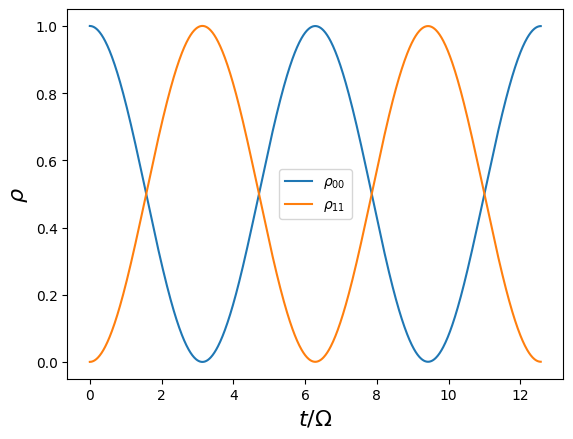

In [2]:
from scipy.integrate import solve_ivp
from math import pi

def optical_bloch_solve(t, ρ0, Omega, Delta=0, Gamma=0):
    def dρ(t, ρ, Ω, Δ=0, Γ=0):
        ρ = ρ.reshape(2,2)
        w = ρ[0,0] - ρ[1,1]
        v = -1j*(ρ[0,1] - ρ[1,0])
        return np.array([
            [ +Ω/2*v + Γ*ρ[1,1], 
              -1j/2*Ω*w - (Γ/2+1j*Δ)*ρ[0,1] ],
            [ +1j/2*Ω*w - (Γ/2-1j*Δ)*ρ[1,0], 
              -Ω/2*v - Γ*ρ[1,1]]
        ]).ravel()
    sol = solve_ivp(dρ, [np.min(t), np.max(t)], ρ0.ravel(), args=(Omega, Delta, Gamma), t_eval=t, method='DOP853')
    return sol.y.reshape(2,2,-1).transpose(2,0,1)


ρ0 = np.array([[1+0j,0],[0,0]]) # initial condition must be complex
t = np.linspace(0, 4*pi, 1000)
sol = optical_bloch_solve(t, ρ0, Omega=1, Delta=0, Gamma=0)
plt.plot(t, sol.real[:,0,0], label=r'$\rho_{00}$')
plt.plot(t, sol.real[:,1,1], label=r'$\rho_{11}$')
plt.legend()
plt.xlabel(r'$t/\Omega$', fontsize=16)
plt.ylabel(r'$\rho$', fontsize=16)

# Problem 1 - Exploring the optical Bloch equations (OBE)

1. Solve the OBE for the duration of a resonant $\pi$ pulse ($\Delta=0$, $\Gamma=0$). Plot the real part of the populations (the diagonal terms) and the imaginary part of the coherences (the off diagonal terms)
2. Solve the OBE for a resonant $\pi/2$ pulse, and plot the populations and coherences.
3. Solve the OBE for a duration of several $\pi$ pulses for detunings $\Delta = 0, 0.2\Omega, 0.4\Omega, 0.6\Omega, 0.8\Omega, \Omega$. Plot the population of state $\left|1\right>$ for each detuning on the same figure. Write two sentences that describe how the evolution of the states changes with detuning.
4. Solve the OBE with an initial condition of $\left|c_2(0)\right|^2=1$, with Rabi frequency $\Omega=0$ and $\Gamma=1$. 
5. Solve the OBE for several $\pi$ pulses with a damping rate of $\Gamma = 0.1$. Plot the populations as a function of time.
6. Use these experiments to summarize how the states evolve as a function of time, in the different regimes when detuning and damping are small (compared to Rabi frequency), when damping is large, and when detuning is large.

# Problem 2 - Rabi spectroscopy
1. For the initial condition $\left|c_1(0)\right|^2=1$, plot the value of $\left|c_2(T_f)\right|^2$ as a function of detuning $\Delta$ for three different values of $T_f$, $T_f = \pi/\Omega$, $T_f=3\pi/\Omega$, and $T_f=9\pi/\Omega$. If you were using this experiment to determine the value of $\Omega$, what is the precision of the experiment as a function of $T_f$ (roughly the $\pm$ width of the zeros of the central peak).
2. Calculate the Rabi lineshape for a duration of $T_f=3\pi/\Omega$ for different values of damping, $\Gamma = 0, \Gamma = 0.5 \Omega$ and $\Gamma = \Omega$. How does increasing $\Gamma$ affect the precision?

# Problem 3 - Ramsey spectroscopy
In Ramsey spectroscopy, we apply pairs of $\pi/2$ pulses separated by a delay.
1. Calculate a Ramsey sequence. Begin with the initial condition $\left|c_2(0)\right|^2=1$, For an intial Rabi frequency $\Omega_0$, $\Delta=0$, $\Gamma=0$, solve the OBE for the duration of a $\pi/2$ pulse. Then change $\Omega=0$ and solve for a duration of $T = 3*pi/\Omega_0$. Finally, change $\Omega=\Omega_0$ and evaluate a final $\pi/2$ pulse. Plot the populations and coherences as a function of time for the entire sequence.
2. Plot the population at the end of the Ramsey sequence of duration $T = 3*pi/\Omega_0$, $\left|c_2(T+\pi/(2\Omega) + \pi/(2\Omega))\right|^2$ as a function of detuning. On the same figure plot a Rabi lineshape for duration of $T_f = T = 3*pi/\Omega_0$. How do the precision of the two different experiments compare? What is different between the two that can account for this difference?
3. Incorporate damping into the Ramsey lineshape. Plot lineshapes for $\Gamma = 0, \Gamma = 0.1 \Omega, 0.3 \Gamma$ and $\Gamma$. What is the precision in each of these cases?